# New ts_gen

In [1]:
import torch
torch.cuda.empty_cache()

In [17]:
from utils.meta_eval import TSGenArgs, create_ds_dict, plot_ds
from experiments.meta_eval.me import me_experiment

args = TSGenArgs()
args.n_epochs = 100
args.test_interval = 100

args.batch_size = 256
args.h_nf = 32
args.gnn_depth = 2
args.n_layers = 2

# Dropout P=0.5:
    # 26 0442/0947 [256 32 2 2]
    # 25 0525 [256 64 3 1]
    # 24 0546 [128 128 4 1]
    # 23 0615 [64, 64, 2, 2]
    # 22 0640 [32, 32, 1, 6]
    # 21 0750 [32, 64, 4, 1]
    # 20 0847 [32, 128, 1, 2]
    # 10 0910 [8, 256, 2, 2] -> do as b=256


# args.remove_existing_data = True

# TODO: sort out logger bug

exp_log = me_experiment(args)

Starting training...
Starting training...
100%|██████████| 27/27 [00:07<00:00,  3.67it/s]
Epoch 1: Training Loss 0.09472787491628314
Epoch 1: Training Loss 0.09472787491628314
100%|██████████| 27/27 [00:07<00:00,  3.69it/s]
Epoch 2: Training Loss 0.07486493285245677
Epoch 2: Training Loss 0.07486493285245677
100%|██████████| 27/27 [00:07<00:00,  3.80it/s]
Epoch 3: Training Loss 0.053119294226674295
Epoch 3: Training Loss 0.053119294226674295
100%|██████████| 27/27 [00:07<00:00,  3.76it/s]
Epoch 4: Training Loss 0.04860574525947076
Epoch 4: Training Loss 0.04860574525947076
100%|██████████| 27/27 [00:07<00:00,  3.78it/s]
Epoch 5: Training Loss 0.04590730927965291
Epoch 5: Training Loss 0.04590730927965291
100%|██████████| 27/27 [00:07<00:00,  3.79it/s]
Epoch 6: Training Loss 0.04437474441130224
Epoch 6: Training Loss 0.04437474441130224
100%|██████████| 27/27 [00:07<00:00,  3.80it/s]
Epoch 7: Training Loss 0.04291030316879706
Epoch 7: Training Loss 0.04291030316879706
100%|██████████| 2

In [18]:
file_name = '26doredo.npy'

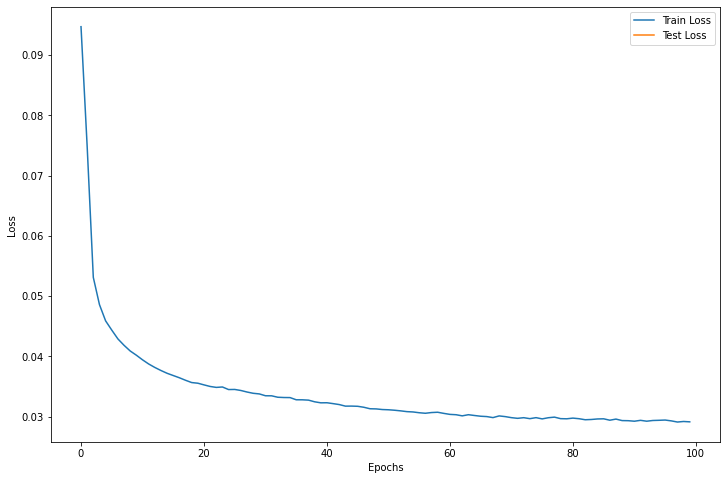

In [19]:
D_folder = 'experiments/meta_eval/d_inits/'
W_folder = 'experiments/meta_eval/ws/'

# 24.npy was 1080s, 8:45PM 19/08

exp_log.save_Ds(file_name, D_folder, save_to_log_dir=True)
exp_log.save_Ws(file_name, W_folder, save_to_log_dir=True)
exp_log.plot_loss(save_fig = False)

### e=100,b=8,h=256, g/l 
- 09/08: no init (dw): 2(2500, 32), 3(2100s, 22), 4(1200, 11) 
- 09/08 no opt (pow): 6(3700, 32), 7(t=3500, 22), 5(2000, 11), 8(t=2400, 11) [6,1,5]
- 09/08: full (opt): 9(3900, 32), 10(3600, 22), 1(?, 11)

### e=100, b=32
- 19-1033 20.npy: g=1,l=2,h=128, t=1500s
- 19-1110 21.npy: g=4,l=1,h=64, t=1750s
- 19-1154 22.npy: g=1,l=6,h=32, t=2280s
- 19-0956PM 27.npy: g=2,l=2,h=32, t=1670s

### e=100, b=64
- 19-1236 23.npy: g=2,l=2,h=64, t=1340s

### e=100, b=128
- 19-0926PM 24.npy: g=4,l=1,h=128, t=2080s

### e=100, b=256
- 19-0906PM 25.npy: g=3,l=1,h=64 [tried at 200 epochs too for 26.npy 0926PM]

/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

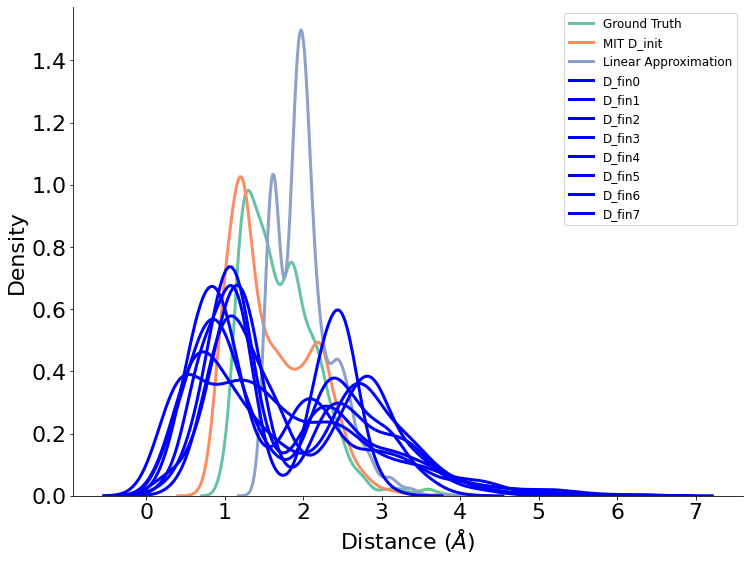

In [20]:
import os
from utils.meta_eval import create_ds_dict, plot_ds

# create ds_dict and plot d_inits
mols_folder = 'data/raw/'
d_folder = 'experiments/meta_eval/d_inits/'
d_plot_name = None # 'fullmit' # os.path.join(os.path.dirname(args.log_dir), 'f8') # None won't save fig

# in other folder: schnet f4 f5 f7 # egnn: f1f2f3
# mit: 21 22 23 24 25 26
# d_files = ['20.npy', '21.npy', '22.npy', '23.npy', '24.npy', '25.npy', '26.npy', '10.npy']
# d_files = ['10do.npy']
d_files = ['20do.npy', '21do.npy', '22do.npy', '23do.npy', '24do.npy', '25do.npy', '26doredo.npy', '10do.npy']
ds_not_to_print = []
ds_dict = create_ds_dict(d_files, d_folder, mols_folder) # TODO: create default d_init class for these?
plot_ds(ds_dict, 'b', ds_not_to_print, None)

# standard: 1(e=100,t=2500s),  6(e=100, t=3850s)

# e=100,b=8,h=256, g/l 
# 09/08: no init (dw): 2(2500, 32), 3(2100s, 22), 4(1200, 11) 
# 09/08 no opt (pow): 6(3700, 32), 7(t=3500, 22), 5(2000, 11), 8(t=2400, 11) [6,1,5]
# 09/08: full (opt): 9(3900, 32), 10(3600, 22), 1(?, 11)

## Ensemble

Average all produced $D_{inits}s$ then plot.

/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

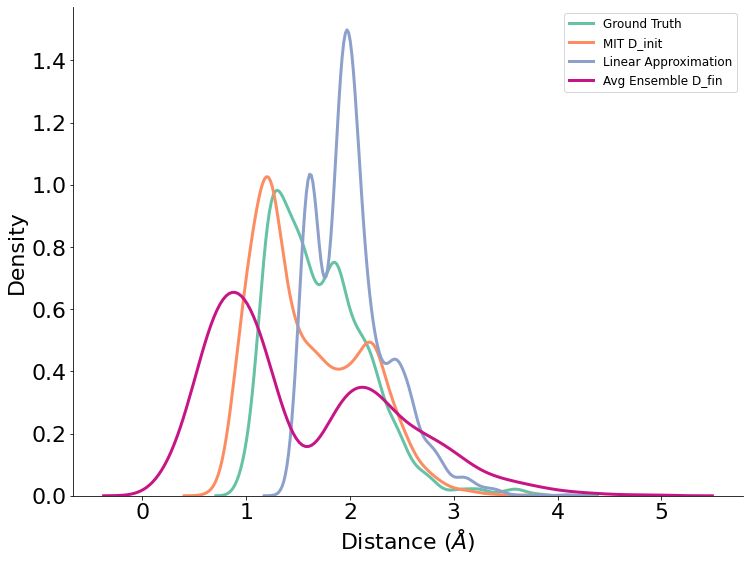

In [5]:
from utils.meta_eval import ensemble_plot, create_ds_dict

mols_folder = 'data/raw/'
d_folder = 'experiments/meta_eval/d_inits/'

# d_files = ['20.npy', '21.npy', '22.npy', '23.npy', '24.npy', '25.npy', '26.npy', '10.npy']
d_files = ['20do.npy', '21do.npy', '22do.npy', '23do.npy', '24do.npy', '25do.npy', '26do.npy', '10do.npy']
ds_dict = create_ds_dict(d_files, d_folder, mols_folder)
ds_not_to_print = []

# ens_plot_name = os.path.join(os.path.dirname(ens_plot_folder), 'dw-ens')
ensemble_plot(ds_dict, ds_not_to_print, print_my_ds=False, sort=True, col='mediumvioletred', name=None)

## PyMol

In [6]:
from rdkit import Chem, Geometry
import py3Dmol

In [ ]:
ts_mols = []
for bx in range(X.shape[0]):
    
    # Make copy of reactant
    mol_target = test_data[bx][0]
    mol = Chem.Mol(mol_target)

    for i in range(mol.GetNumAtoms()):
        x = X[bx, i, :].tolist()
        mol.GetConformer().SetAtomPosition(
            i, Geometry.Point3D(x[0], x[1], x[2])
        )
    ts_mols.append(mol)


model_ts_file = 'data/model_ts.sdf'
ts_writer = Chem.SDWriter(model_ts_file)
for i in range(len(ts_mols)):
    ts_writer.write(ts_mols[i])

In [5]:
def clean_ts(mols):
    
    r_mol, ts_mol, p_mol = mols
    r_bonds = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in r_mol.GetBonds()]
    r_bonds = [tuple(sorted(b)) for b in r_bonds]
    p_bonds = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in p_mol.GetBonds()]
    p_bonds = [tuple(sorted(b)) for b in p_bonds]
    common_bonds = list(set(r_bonds) & set(p_bonds))
    
    emol = Chem.EditableMol(ts_mol)
    for bond in ts_mol.GetBonds():
        bond_idxs = tuple(sorted((bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())))
        if bond_idxs not in common_bonds:
            emol.RemoveBond(bond_idxs[0], bond_idxs[1])
            emol.AddBond(bond_idxs[0], bond_idxs[1])
    return r_mol, emol.GetMol(), p_mol


def show_mol(mol, view, grid):
    mb = Chem.MolToMolBlock(mol)
    view.removeAllModels(viewer=grid)
    view.addModel(mb,'sdf', viewer=grid)
    view.setStyle({'model':0},{'stick': {}}, viewer=grid)
    view.zoomTo(viewer=grid)
    return view

In [ ]:
n=1
mols = [test_data[n][0], ts_mols[n], test_data[n][1]]
view_mols = clean_ts(mols)

view = py3Dmol.view(width=960, height=500, linked=False, viewergrid=(1,3))
for i in range(3):
    show_mol(view_mols[i], view, grid=(0, i))
view.render()

# Final

In [89]:
import matplotlib.pyplot as plt

def plot_tt_loss(log_file, save_fig = False):
    train_loss = []
    with open(log_file) as f:
        lines = f.readlines()
        for line in lines:
            if ': Training Loss' in line:
                train_loss.append(float(line.split(' ')[-1].rstrip()))

    return train_loss
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.plot(np.arange(len(train_loss)), train_loss, label='Train Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

    if save_fig:
        fig.savefig(os.path.join(os.path.dirname(log_file), 'tt_loss.png'), bbox_inches='tight')

In [90]:
train_loss = plot_tt_loss('ens.log')
losses = [[] for x in range(8)]
len(losses)

8

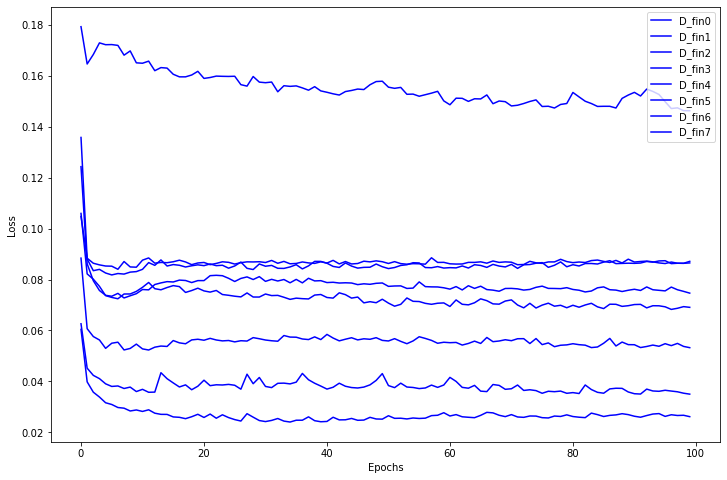

In [102]:
for i in range(8):
    losses[i] = train_loss[i*100: (i+1)*100]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i in range(8):
    ax.plot(np.arange(100), losses[i], label=f'D_fin{i}', color='b')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
# fig.savefig('tt_loss-b.png', bbox_inches='tight')

In [ ]:
ens_losses = []
for i in range(100):
    ens_loss = 0
    for j in range(8):
        ens_loss += losses[j][i]
    ens_loss /= 8
    ens_losses.append(ens_loss)

In [104]:
len(ens_losses)

100

In [105]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(np.arange(100), ens_losses, label='Ensemble D_fin', color='mediumvioletred', linewidth=4) 
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
fig.savefig('tt_loss-ens.png', bbox_inches='tight')

In [83]:
ax.plot(np.arange(100), ens_losses, label=f'Ensemble D_fin', color='mediumvioletred') 
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
fig.savefig('tt_loss-ens.png', bbox_inches='tight')

ValueError: Invalid RGBA argument: 'mediumredviolet'